## <center>Polynomial Regression with SciKit-Learn</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Linear regression/Data Sets/Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

### Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [6]:
poly_model = PolynomialFeatures(degree=2, include_bias=False)

# interactions_only -->PolynomialFeatures creates interactions coefficients between the different features in the data set.
# include_bias --> addition of 1 column, not necessary when doing regression.

In [7]:
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data

model = poly_model.fit_transform(X)

In [8]:
model.shape, X.shape

# Transform makes the data set bigger, converts the rest of the values in order to perform the polynomial regression

((200, 9), (200, 3))

In [9]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [10]:
model[0] # First three instances are the same as in the original data set
# The next 

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

First three instances are the same as in the original data set, the next three are the interaction terms  $x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $ and the final three are the squared terms.

#### Train, Test and Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(model, y, test_size=0.3, random_state=42)

#### Model for fitting on Polynomial Data

Create an instance of the model with parameters

In [12]:
Poly_model = LinearRegression(fit_intercept=True)

#### Fit/Train the Model on the training data

In [13]:
Poly_model.fit(X_train,y_train)

LinearRegression()

In [14]:
Poly_model.coef_, Poly_model.intercept_

(array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
        -0.00010764,  0.00030191,  0.00017541,  0.00010075]),
 4.718521645342802)

In this case we have the following function:

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_1x_2 + \beta_5x_1x_3 + \beta_6x_2x_3 + \beta_7x_1^2 + \beta_8x_2^2 + \beta_9x_3^2$$

Poly_model.coef_ give the coefficients from $\beta_1$ to $\beta_9$, Poly_model.intercept_ gives the coefficient for $\beta_0$

#### Evaluation on the Test Set

In [15]:
y_pred = Poly_model.predict(X_test)

In [16]:
mean_sales =df['sales'].mean()
mean_sales

14.022500000000003

In [17]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [18]:
MAE, 100*MAE/mean_sales

(0.5905974833808014, 4.211784513323597)

In [19]:
MSE, 100*MSE/mean_sales # Not very comparable with the raw data, is always better to use RMSE

(0.5231944949055402, 3.7311071128938496)

In [20]:
RMSE, 100*RMSE/mean_sales # Not very comparable with the raw data, is always better to use RMSE

(0.7233218473857541, 5.158294508010369)

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.51
    * RMSE: 1.94

* Polynomial 2-degree:
    * MAE: 0.59
    * RMSE: 0.72

### Choosing a Model

#### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [21]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [22]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838924,
 0.468875811182209,
 0.36946897017715913,
 0.24382206944384693,
 0.19588511246501666,
 0.5285043912543516,
 0.15561637080778137,
 0.10358970860544592]

In [23]:
test_rmse_errors

[1.948537204344638,
 0.7233218473857541,
 0.5392350985706048,
 1.3032266410187556,
 5.9467040387219,
 25.373802138516602,
 602.6179560672205,
 3683.480098043838,
 185402.9386718897]

In this case we can see the following:
- The RMSE for the training data is always decreasing, which would indicate: the higher the polynomial the better
- The RMSE for the test data shows an absolute different trend, passing a third degree polynomial fit the RMSE explodes and increases exponentially.

In this case the best degree to chose is the third degree. 

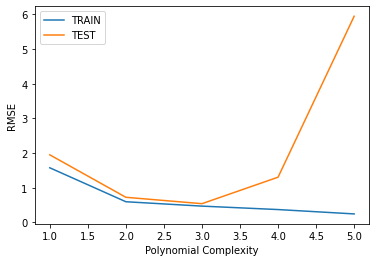

In [24]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

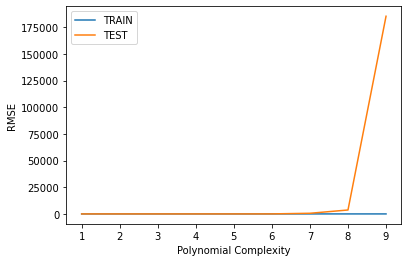

In [25]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

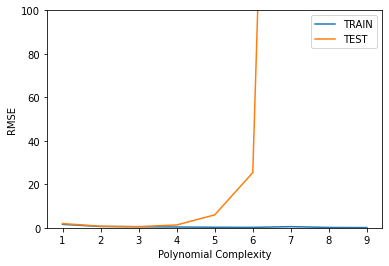

In [26]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

#### Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

In [27]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
X_new = final_poly_converter.fit_transform(X)

In [28]:
final_model = LinearRegression()

In [29]:
final_model.fit(X_new,y)

LinearRegression()

#### Saving Model and Converter

In [30]:
from joblib import dump, load

In [31]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [32]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

#### Deployment and Predictions

Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

In [33]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [34]:
campaign = [[149,22,12]]

In [35]:
campaign_poly = loaded_poly.transform(campaign) # In this case only transform could be used, the fitting 
                                                    # was performed previously

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [36]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [37]:
final_model.predict(campaign_poly)

array([14.64501014])